<h1 style="text-align:center;">Introdução à Otimização</h1>
<h2 style="text-align:center;">Lista 2</h2>
<h2 style="text-align:center;">Aluno: Wagner Franco da Silva Junior

### Problema 1 (formulação matemática de problema geométrico): 

Determine o triângulo de área mínima contendo dois círculos de raio um que são disjuntos (i.e., <b> não </b> se intersetam). Para assegurar uniformidade de notação (e facilitar a correção), sejam os vértices do triângulo localizados nos pontos $(0,0), (x_1,0),(x_2,x_3)$ e os centros dos círculos no triângulo $(x_4,x_5)$, $(x_6,x_7)$. Formule como problema de otimização, explicitando função objetivo, variáveis de decisão, e restrições. A sua formulação resultou em qual tipo de problema de otimização? 

<b>Sugestão</b>: Utilize a formula para a distância entre um ponto e uma reta discutida na aula 4 (slide 4-17).

## Função Objetivo

Queremos minimizar a área do triângulo. A área de um triângulo pode ser expressa como:

\[
$\text{Área} = \frac{1}{2} \left| x_1 \cdot x_3 \right|$
\]

Assim, a **função objetivo** é minimizar essa área:

\[
$\min \; 0.5 \times |x_1 \cdot x_3|$
\]

### Variáveis de Decisão

As variáveis de decisão são os valores de $(x_1)$, $(x_2)$, $(x_3)$, $(x_4)$, $(x_5)$, $(x_6)$, e $(x_7)$, que representam as coordenadas dos vértices do triângulo e os centros dos círculos.

### Restrições

1. **Distância mínima dos círculos para os lados do triângulo**: 
   - Cada círculo deve estar a uma distância mínima de 1 unidade de cada lado do triângulo.

   - **Lado 1**: A linha entre $(0, 0)$ e $(x_1, 0)$ está sobre o eixo x. Portanto, os centros dos círculos devem estar pelo menos a 1 unidade de distância verticalmente:
     \[
     $x_5 \geq 1 \quad \text{e} \quad x_7 \geq 1$
     \]

   - **Lado 2**: A linha entre $(0, 0)$ e $(x_2, x_3)$. A distância de um ponto $(x, y)$ até essa reta é dada por:
     \[
     $|a_1 \cdot x + a_2 \cdot y| \geq \sqrt{a_1^2 + a_2^2}$
     \]
     onde $(a_1 = x_3)$ e $(a_2 = -x_2)$.

   - **Lado 3**: A linha entre $(x_1, 0)$ e $(x_2, x_3)$, com vetor normal $(a_3, a_4)$ = $(x_3, x_2 - x_1)$. A distância dos centros dos círculos para essa linha é:
     \[
     $|a_3 \cdot x + a_4 \cdot y - b| \geq \sqrt{a_3^2 + a_4^2}$
     \]
     onde $(b = a_3 \cdot x_1)$.

2. **Distância Mínima Entre os Círculos**: Para garantir que os círculos não se intersectem, a distância entre seus centros deve ser pelo menos 2 unidades (pois o diâmetro de cada círculo é 2):

   \[
   $(x_6 - x_4)^2 + (x_7 - x_5)^2 \geq 4$
   \]

---

É um **problema de otimização não linear** devido às restrições de distância entre os círculos e os lados do triângulo.


In [ ]:
using JuMP
using Ipopt

# Modelo de otimização
model = Model(Ipopt.Optimizer)

# Variáveis
@variable(model, x1)
@variable(model, x2)
@variable(model, x3 >= 0)
@variable(model, x4)
@variable(model, x5 >= 1)  # Condição inicial
@variable(model, x6)
@variable(model, x7 >= 1)  # Condição inicial

# Função objetivo
@NLobjective(model, Min, 0.5 * x1 * x3)

# Restrições não lineares
a1, a2 = x3, -x2
@NLconstraint(model, (a1 * x4 + a2 * x5)^2 >= (a1^2 + a2^2))
@NLconstraint(model, (a1 * x6 + a2 * x7)^2 >= (a1^2 + a2^2))

a3, a4 = x3, x2 - x1
b2 = a3 * x1
@NLconstraint(model, (a3 * x4 + a4 * x5 - b2)^2 >= (a3^2 + a4^2))
@NLconstraint(model, (a3 * x6 + a4 * x7 - b2)^2 >= (a3^2 + a4^2))

# Distância mínima entre os círculos
@NLconstraint(model, (x6 - x4)^2 + (x7 - x5)^2 >= 4)

# Otimização
optimize!(model)

# Verificação e saída de resultados
if termination_status(model) == MOI.OPTIMAL
    println("Solução ótima encontrada:")
    println("Vértices do triângulo: (0, 0), ($(value(x1)), 0), ($(value(x2)), $(value(x3)))")
    println("Centro do círculo 1: ($(value(x4)), $(value(x5)))")
    println("Centro do círculo 2: ($(value(x6)), $(value(x7)))")
    println("Área mínima do triângulo: ", value(0.5 * x1 * x3))
else
    println("Não foi possível encontrar uma solução ótima.")
end


### Problema 2 (Ajuste de uma curva constante por pedaços)

Considere um sinal ruidoso (sequência de pontos) que é aproximadamente constante por pedaços, como ilustrado na Figura abaixo:

![fig_prob6.png](attachment:image.png)

Na figura, $x \in R^n$ representa o sinal desconhecido constante por pedaços e $y$ representa a versão ruidosa medida dd sinal $x$ (ou seja, $y$ é o sinal original $x$ mais ruido). Dado $y$, gostaríamos de computar uma estimativa $\hat{x}$ do sinal original $x$ tal que $\hat{x}$ tenha o menor número de mudanças em instantes consecutivos. Modelamos esta exigência minimizando o número de elementos não-nulos do vetor de diferenças $D\hat{x}$, sendo $D \in R^{(n-1)\times n}$ a matriz de diferenças
$$
D = \begin{bmatrix} 
-1 & 1 & 0 & \cdots & 0 \\
0 & -1 & 1 & \vdots & 0 \\
\vdots & & & \ddots & \\
0 & \cdots & 0 & -1 & 1
\end{bmatrix}
$$
o que significa que $D\hat{x} = \left[\hat{x}_2 - \hat{x}_1, \hat{x}_3 - \hat{x}_2, \ldots , \hat{x}_n - \hat{x}_{n-1}\right]^T$. Com esta definição de $D$, chega-se ao problema de otimização:
\begin{align}
& \min_{\hat{x}} \|y - \hat{x}\|_2^2 \\
& \text{s.a.}~\text{card} (D\hat{x}) \leq k
\end{align}
sendo card($D\hat{x}$) = número de elementos não-nulos de $D\hat{x}$, e $k$ uma estimativa do número de saltos (degraus) no sinal. Este problema é difícil de resolver, pois $\text{card}(\cdot)$ é uma função descontínua, e pode ser substituído pela versão regularizada
\begin{equation}
\min_{\hat{x}} \|y - \hat{x}\|_2^2  + \gamma \| (D\hat{x}) \|_p
\end{equation}
sendo $\gamma$ o parâmetro de regularização. Resolva o problema regularizado para $p = 1, 2$:

- indicando claramente que tipo de problema você está resolvendo (LP, QP, QCQP etc.)
- plotando os gráficos do sinal reconstruído (=estimado) e o sinal original, comentando as características das soluções obtidas.

Gere seu sinal de ruído considerando que o sinal original é descrito por:
$$
x = \left\{
\begin{array}{l}
k_1 = 0.5,~\text{se}~t \in [0,2.8) \\
k_2 = 1.5,~\text{se}~t \in [2.8,4.8) \\
k_3 = 1.1,~\text{se}~t \in [4.8,5.2) \\
k_4 = 0.1,~\text{se}~t \in [5.2,7.9)\\
k_5 = -1,~\text{se}~t \in  [7.9,10]
\end{array}
\right.
$$
e que o sinal ruidoso $y$ é gerado a partir de $x$, acrescentando um ruido gaussiano de média $k_i$ e variância $0.01$ ao $i$-ésimo trecho constante de $x$. Forneça o par de sinais $x,y$ no *notebook* entregue. Para o problema proposto, trabalhe com 100 amostras igualmente espaçadas dos sinais contínuos gerados.

In [ ]:
#Inserir resposta 2

### Problema 3 (Regressão $L_2$ versus regressão $L_1$):
É comum encontrar conjuntos de dados contendo *outliers*, ou seja, dados ruins oriundos de erro experimental, ruido alto ou malfuncionamento de sensores. Considere por exemplo o seguinte conjunto de 15 pares $(x,y)$ de pontos experimentais:


|x |	1 |	2 |	3 |	4 |	5 |	6 |	7 |	8 |	9 |	10 |	11 |	12 |	13 |	14 |	15 |
|--|------|---|---|---|---|---|---|---|---|----|-------|-------|-------|-------|-------|
|y |	6.31 |	3.78 |	24 |	1.71 |	2.99 |	4.53 |	2.11 |	3.88 |	4.67 |	4.25 |	2.06 |	23 |	1.58 |	2.17 |	0.02  |

Os valores de $y$ correspondentes a $x=3$ and $x=12$ são outliers porque estão muito distantes do intervalo de valores esperado no experimento.

(a) Compute a reta de melhor ajuste usando um custo $L_2$ cost (i.e., mínimos quadrados). Ou seja, encontre $a$ e $b$ that que minimizem a expressão:

\[
$L_2~\mbox{custo}:~\sum_{i=1}^{15} (y_i - ax_i - b)^2$
\]

Repita o cálculo da reta de melhor ajuste, porém, desta vez, exclua os outliers do conjunto de dados. No mesmo plot, mostre os dados (todos) e ambas retas de melhor ajuste. Explique a diferença entre as duas retas de melhor ajuste.

(b) Nem sempre é possível remover outliers manualmente. Vamos investigar um método auotmático de reduzir o efeito de outliers, através da troca da função objetivo. Encontre a reta de melhor ajuste de novo (**sem** retirar os outliers), porém desta vez utilize a função de custo $L_1$:
$$
	L_1~\mbox{custo}:~\sum_{i=1}^{15} \left| y_i - ax_i - b \right|
$$
Plote os dados bem como a reta de melhor ajuste $L_1$. O que você observa sobre a influência de outliers na reta de melhor ajuste $L_1$? O custo $L_1$ lida melhor com outliers do que o método de mínimos quadrados? Explique sua resposta. 

In [1]:
using JuMP
using OSQP
using Plots

# Dados fornecidos
x = 1:15
y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]

# Função para regressão L2 usando Programação Quadrática
function regressao_L2_PQ(x, y)
    modelo = Model(OSQP.Optimizer)
    @variable(modelo, a)
    @variable(modelo, b)
    
    # Função objetivo de custo L2
    @objective(modelo, Min, sum((y[i] - (a * x[i] + b))^2 for i in 1:length(x)))
    
    optimize!(modelo)
    return value(a), value(b)
end

# Função para regressão L1 usando programação linear
function regressao_L1(x, y)
    modelo = Model(OSQP.Optimizer)
    @variable(modelo, a)
    @variable(modelo, b)
    @variable(modelo, res[1:length(x)] >= 0)
    
    @objective(modelo, Min, sum(res))
    for i in 1:length(x)
        @constraint(modelo, res[i] >= y[i] - (a * x[i] + b))
        @constraint(modelo, res[i] >= -(y[i] - (a * x[i] + b)))
    end
    
    optimize!(modelo)
    return value(a), value(b)
end

# Calculando a regressão L2 com e sem outliers usando programação quadrática
a_L2, b_L2 = regressao_L2_PQ(x, y)
a_L2_no_outliers, b_L2_no_outliers = regressao_L2_PQ(x[[1:2; 4:11; 13:15]], y[[1:2; 4:11; 13:15]])

# Calculando a regressão L1 (sem remover os outliers)
a_L1, b_L1 = regressao_L1(x, y)

# Plot L2 (com e sem outliers)
scatter(x, y, label="Dados", legend=:bottomright, xlabel="x", ylabel="y")
plot!(x -> a_L2 * x + b_L2, 1, 15, label="L2 com outliers", color=:blue)
plot!(x -> a_L2_no_outliers * x + b_L2_no_outliers, 1, 15, label="L2 sem outliers", color=:green)
title!("Regressão L2 com e sem outliers")

# Plot L1 (com outliers)
plot!(x, y, seriestype=:scatter, label="Dados", legend=:bottomright, xlabel="x", ylabel="y")
plot!(x -> a_L1 * x + b_L1, 1, 15, label="L1 com outliers", color=:red)
title!("Regressão L1 com outliers")

ArgumentError: ArgumentError: Package JuMP not found in current path.
- Run `import Pkg; Pkg.add("JuMP")` to install the JuMP package.

### Problema 4 (QP): (Continuação do problema anterior)
Outra abordagem é utilizar custo $L_2$ para pontos próximos à reta, porém custo $L_1$ para pontos que estão longes da reta. Especificamente, seguindo o estatístico Huber, define-se a função de custo:
\begin{equation}
\phi(x) =
    \left\{
        \begin{array}{l}
            x^2, \quad \text{if}~-M \leq x \leq M \\
            2M|x| - M^2 \quad \text{senão}
        \end{array}
     \right.
\end{equation}
Embora a fórmula seja simples, ela precisa ser manipulada para que fique no formato de um programa quadrático e convexo, e essa manipulação resulta no seguinte QP convexo:
\begin{equation}
\phi(x) =
    \left\{
        \begin{array}{l}
            \text{minimize}_{v,w}~ w^2 + 2 Mv \\
            \text{sujeito a}~|x| \leq w + v \\
            \qquad v \geq 0, w \leq M
        \end{array}
     \right.
\end{equation}
Utilize $M=1$, e plote a função $\phi(x), -3 \leq x \leq 3$ gerada por ambas as expressões acima e verifique que são, de fato, equivalentes. Finalmente, encontre a reta de melhor ajuste aos dados especificados em Q.1, plotando seu resultado. A função objetivo para esta parte é:
\begin{equation}
\sum_{i=1}^{15} \phi(y_i - ax_i - b)
\end{equation}

In [ ]:
#inserir resposta 4

### Problema 5 (Compromisso [tradeoff])
Deseja-se enviar uma sequência de entradas (tensões) ao manipulador do braço de um robô. Os dados se encontram no arquivo *voltages.csv* e estão plotados abaixo.

![image.png](attachment:image.png)

Mudanças bruscas (que ocorrem no gráfico das tensões mostrado acima) danificam os motores do manipulador, portanto deseja-se suavizar as transições (saltos) no sinal. Denotando as tensões por $v_i, i = 1, 2, \ldots, 200$, uma maneira de caracterizar suavidade do sinal é através da soma das diferenças ao quadrado:
\begin{equation}
    R(v) = (v_2 - v_1)^2 + (v_3 - v_2)^2 + \cdots + (v_{200} - v_{199})^2
\end{equation}
Quanto menor $R(v)$, mais suave o sinal. Formule e resolva um problema de mínimos quadrados regularizado que equilibra os dois objetivos de aproximar o sinal mostrado no gráfico acima, porém também impor um certo grau de suavidade. Explique seu raciocínio ao formular o modelo e inclua um gráfico comparando as tensões desejadas com as tensões suavizadas que você gerou através do seu modelo de mínimos quadrados regularizado.

In [ ]:
#inserir resposta 5

### Problema 6 (variáveis binárias): 

Resolva o problema abaixo com variáveis de decisão reais $x_1,x_2 \in {\mathbb{R}}$, usando _qualquer método consistente_ . O símbolo $\vee$ denota o operador lógico OU <b>não exclusivo</b>, e a equação descrevendo as restrições significa que vale OU grupo 1 (as três restrições entre o primeiro par de parênteses), OU grupo 2 (as três restrições entre o segundo par de parênteses) OU grupo 3 (as três restrições entre o terceiro par de parênteses).
$$
	\min_{x_1,x_2}\;  x_1 + 3x_2 
$$
sujeito a:
$$
\left(
\begin{array}{c}
2x_1 - x_2 \geq  -3\\-x_1 + x_2 \geq 2 \\ x_1 \geq 0
\end{array}
\right)
\vee
\left(
\begin{array}{c}
4x_1 - 2x_2 \geq  4\\-2x_1 + 2x_2 \geq -2 \\ x_1 +x_2 \geq 2
\end{array}
\right)
\vee
\left(
\begin{array}{c}
6x_1 - 3x_2 \geq  0\\-3x_1 + 3x_2 \geq 1 \\ 2x_1 + 3x_2 \geq 3
\end{array}
\right)
$$
O problema é convexo? Reformule como MILP.


<b>Sugestão</b>: Para a reformulação MILP introduza variáveis binárias $\delta_i$, $i=1,2,3$, para cada conjunto de restrições (entre parênteses). Ou seja, se escrever as restrições como $P$ ou $Q$ ou $R$, associa-se $\delta_1$ a $P$, $\delta_2$ a $Q$ e $\delta_3$ a $R$.


In [ ]:
#inserir resposta 6

# Problema 7 (QP, formulação matemática)

(<i>Localização ótima de um helicóptero de resgate</i>) Sejam $(x,y)$ as coordenadas da base de um helicóptero de resgate e $(0,0), (5,-1), (4,6), (1,3)$ as coordenadas dos pontos nos quais o helicóptero tem que buscar vítimas (= pontos de resgate), mais rapidamente possível. Supondo que o helicóptero sempre se desloca numa velocidade constante, formule como problema de otimização, especificando claramente a função objetivo <b>[1.0 ponto]</b>, variáveis de decisão <b>[0.5 pontos]</b>, e restrições <b>[0.5 pontos]</b>. Encontre a solução numérica, utilizando JuMP <b>[bônus de 1 ponto]</b>. 

_Sugestão_: É preciso minimizar a máxima distância entre a base e os pontos de resgate. Ou seja,  todos os pontos de resgate devem estar dentro do raio de ação helicóptero,  e deseja-se minimizar este raio.

In [ ]:
#inserir resposta 7

### Problema 8 (MA, AR, ARMA via mínimos quadrados)

There are many ways to model the relationship between an input sequence $\{u_1, u_2,\dots\}$ and an output sequence $\{y_1, y_2,\dots\}$. In class, we saw the moving average (MA) model, where each output is approximated by a linear combination of the k most recent inputs:
$$ \text{MA:}\quad y_t \approx b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1} $$

We then used least-squares to find the coefficients $b_1,\dots, b_k$. What if we didn’t have access to the inputs at all, and we were asked to predict future y values based only on the previous y values? One way to do this is by using an autoregressive (AR) model, where each output is approximated by a linear combination of the $\ell$ most recent outputs (excluding the present one):
$$ \text{AR:}\quad y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_\ell y_{t-\ell} $$

Of course, if the inputs contain pertinent information, we shouldn’t expect the AR method to outperform the MA method!

a) Using the same dataset from class uy_data.csv, plot the true y, and on the same axes, also plot the estimated $\hat y$ using the MA model and the estimated $\hat y$ using the AR model. Use $k = 5$ for both models. To quantify the difference between estimates, also compute $\|y - \hat h\|$ for both cases.

b) Yet another possible modeling choice is to combine both AR and MA. Unsurprisingly, this is called the autoregressive moving average (ARMA) model:
$$ \text{ARMA:}\quad y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_\ell y_{t-\ell} + b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1} $$

Solve the problem once more, this time using an ARMA model with $k = \ell = 1$. Plot $y$ and $\hat y$ as before, and also compute the error $\|y - \hat y\|$.

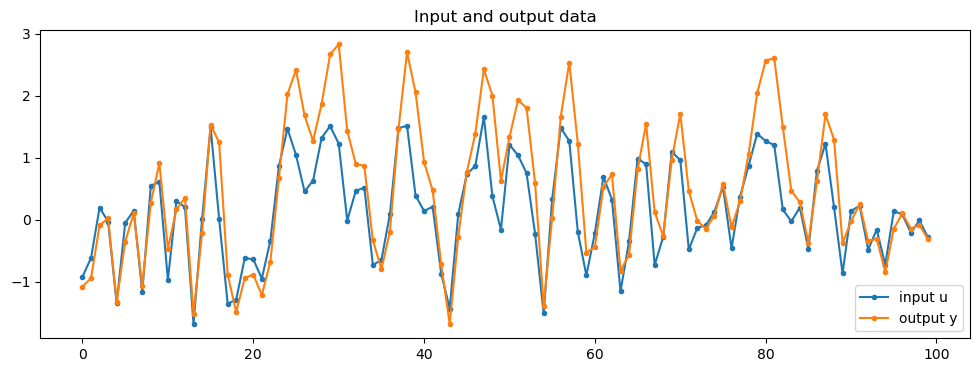

In [2]:
raw = [-0.9188 -1.0773
-0.6159 -0.9419
0.1959 -0.0915
-0.0316 0.0245
-1.3455 -1.3239
-0.0513 -0.3536
0.1471 0.1032
-1.1615 -1.0702
0.5478 0.2722
0.6096 0.9127
-0.9706 -0.4672
0.3018 0.1654
0.2039 0.3515
-1.6833 -1.5158
0.0057 -0.2207
1.4925 1.5337
0.0113 1.2458
-1.3563 -0.8868
-1.288 -1.488
-0.6159 -0.9394
-0.639 -0.884
-0.9488 -1.2152
-0.3364 -0.6755
0.8631 0.6695
1.4679 2.0192
1.0442 2.4178
0.4562 1.6812
0.6309 1.2713
1.3197 1.8668
1.5108 2.6653
1.2262 2.8286
-0.0127 1.4358
0.4645 0.8995
0.5191 0.8685
-0.7274 -0.3292
-0.6509 -0.7965
0.0901 -0.1906
1.4747 1.4607
1.5163 2.7007
0.3898 2.0539
0.1405 0.9278
0.2109 0.4734
-0.8675 -0.7146
-1.4313 -1.6855
0.0905 -0.2711
0.7334 0.7681
0.8687 1.3874
1.658 2.4258
0.3784 2.0024
-0.1594 0.6279
1.2091 1.3279
1.0389 1.9324
0.7494 1.7987
-0.229 0.5894
-1.5111 -1.3858
0.3298 0.0347
1.481 1.6587
1.2702 2.5347
-0.1956 1.2286
-0.8984 -0.53
-0.2123 -0.4387
0.6902 0.5329
0.3256 0.7312
-1.1566 -0.823
-0.349 -0.5661
0.9869 0.8105
0.892 1.5486
-0.7315 0.1209
-0.2765 -0.2639
1.0961 0.9674
0.959 1.7094
-0.4793 0.4625
-0.129 -0.0227
-0.0896 -0.1439
0.1326 0.0645
0.5292 0.5793
-0.4606 -0.1214
0.3742 0.298
0.8715 1.0606
1.3862 2.0386
1.2687 2.5662
1.203 2.6041
0.166 1.5009
-0.0269 0.4687
0.1963 0.2807
-0.4706 -0.3694
0.7855 0.617
1.2281 1.6969
0.205 1.2934
-0.8645 -0.3791
0.1419 -0.0276
0.2251 0.2533
-0.4831 -0.3436
-0.1577 -0.3082
-0.7281 -0.8429
0.1397 -0.1449
0.0851 0.1008
-0.2105 -0.1442
-0.011 -0.0843
-0.2845 -0.3122]

u = raw[:,1];
y = raw[:,2];
T = length(u)

# plot the u and y data
using PyPlot
PyPlot.svg(true)

figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");
title("Input and output data");

### Problema 8 (SOCP)
A **mediana geométrica** de um conjunto de pontos $x_i, i = 1,\ldots , k$ em $R^2$ é o ponto $x$ que minimiza a soma das distâncias Euclideanas aos pontos $x_i$, Escreva o problema de encontrar a mediana geométrica de $k$ pontos em $R^2$ como um programa cônico de segunda ordem (SOCP).


### Problema 9 (NLLS: mínimos quadrados nãolineares)

A series of experiments is conducted to determine the effect of a particular fertilizer on wheat crop yield. Here are the results:

|fertilizer rate ($x$) |	crop yield ($y$) |
|----------------------|---------------------|
|-5 |	127 |
|-3 |	151 |
|-1 |	379
|1 	| 421 |
|3 |	460 |
|5 |	426 |

Such situations typically involve some sort of diminishing returns. So there is a limit to how much the fertilizer can boost the yield. A popular model for this relationship is the following:
$$y=k_1+ k_2 \exp(k_3 x)$$

Use nonlinear least squares to determine the values of $(k_1,k_2,k_3)$
that provide the best fit to the data. We are expecting coefficients in the neighborhood of $(500,-200,-1)$. To display your result, produce a plot of the original data points and the best-fit curve.

##   Exercícios dos slides

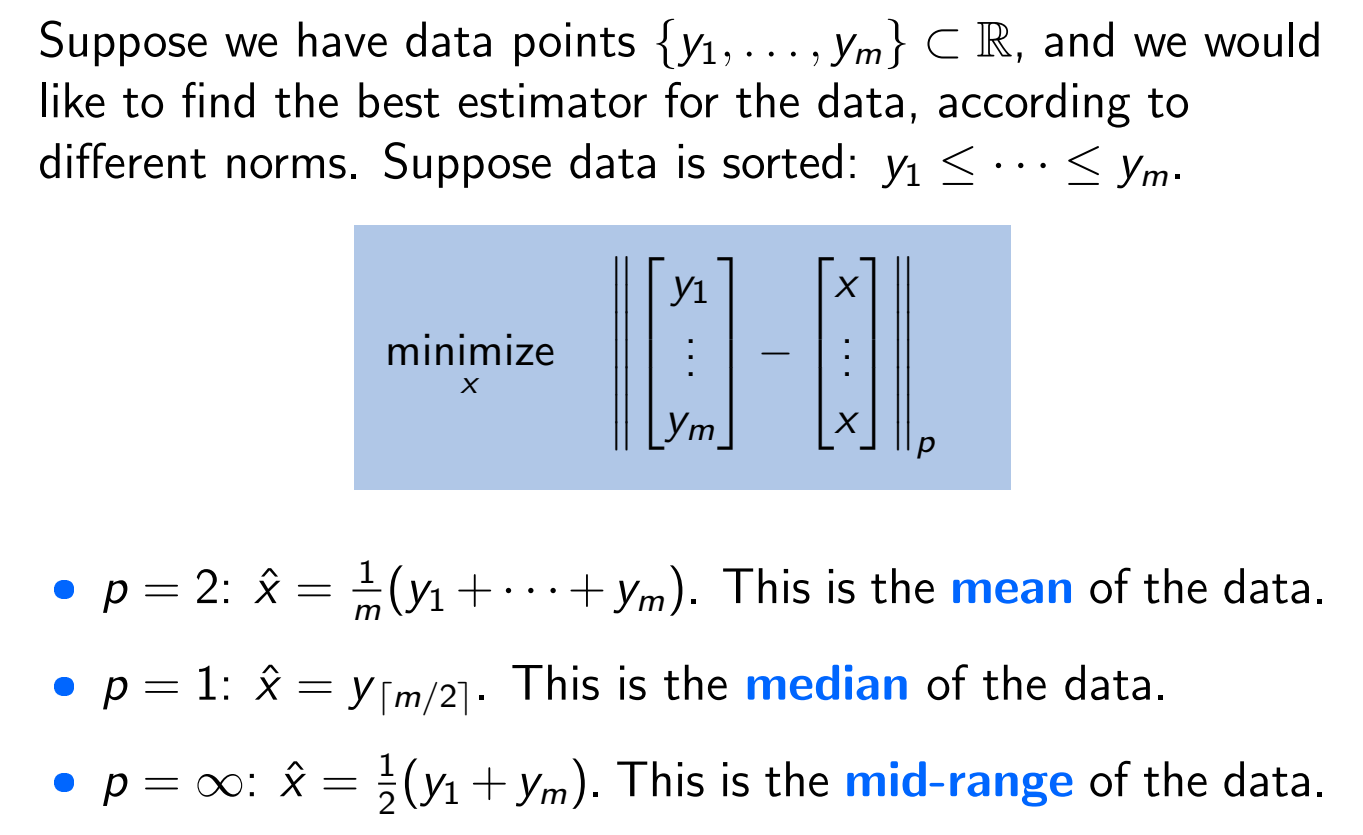

S1. Demonstre as afirmações para $p=1,2,\infty$ acima.

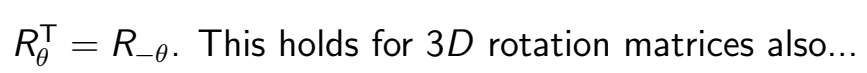
S2. Demonstre isso para matrizes de rotação $2 \times 2$ e $3 \times 3$.

 S3. V ou F. Se V, justifique, Se F, corrija! 
 - Toda matriz possui $n$ autovalores reais.
 - Toda matriz possui $n$ autovetores linearmente independentes
 - Toda matriz possui um conjunto de autovetores ortogonais entre si.
 - Toda matriz simétrica pode ser escrita como uma diferença de matrizes positivas semi-definidas.

S4. Escreva código em Julia para reproduzir o gráfico no slide 12-8
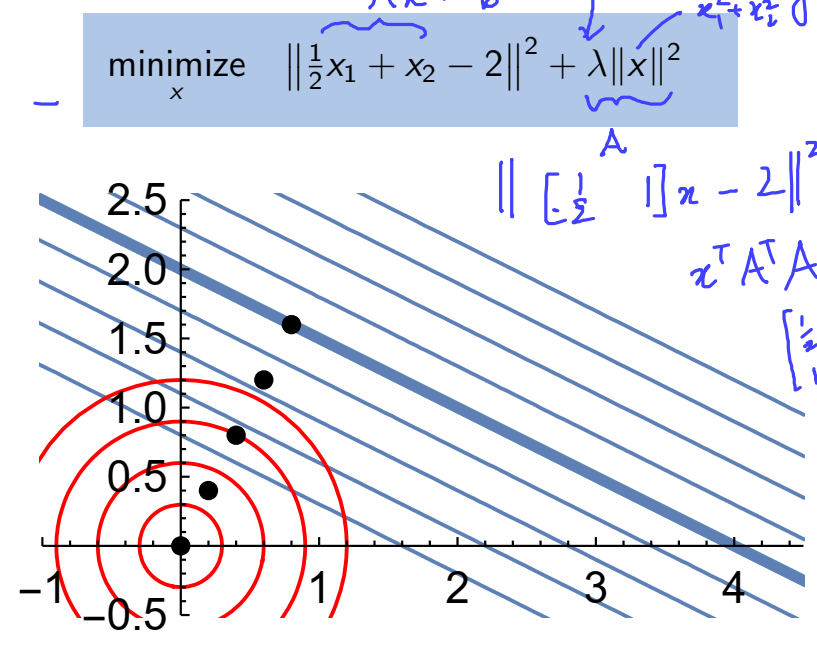

S5. Escreva código em Julia para reproduzir a figura no slide 12-10
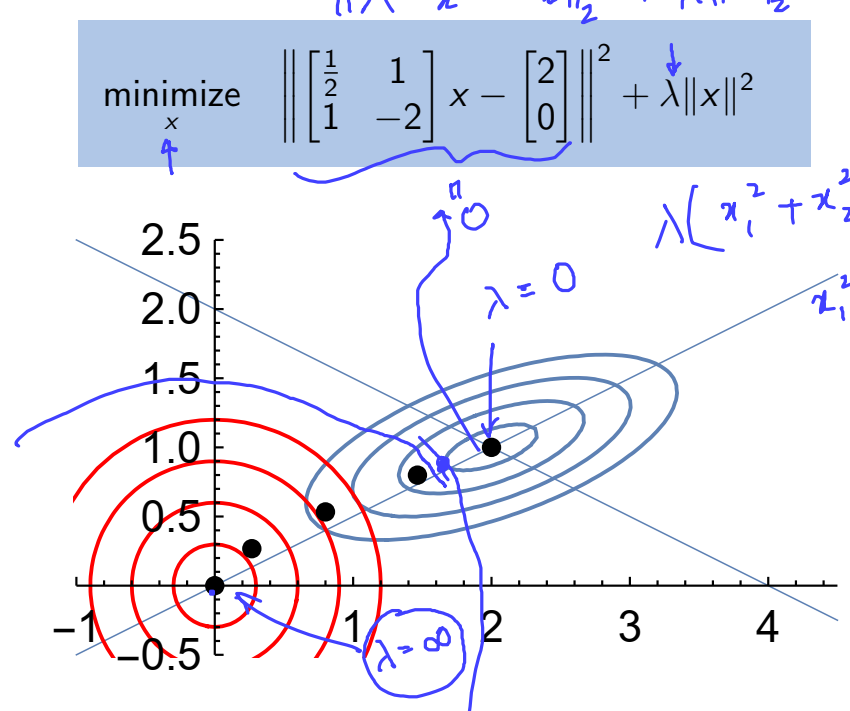

S6. Dê exemplos de $P,q,r$ ilustrando os casos de QPs mostrados nos slides 12-12, 12-13.

S7. Verifique as afrimações no slide 12-25
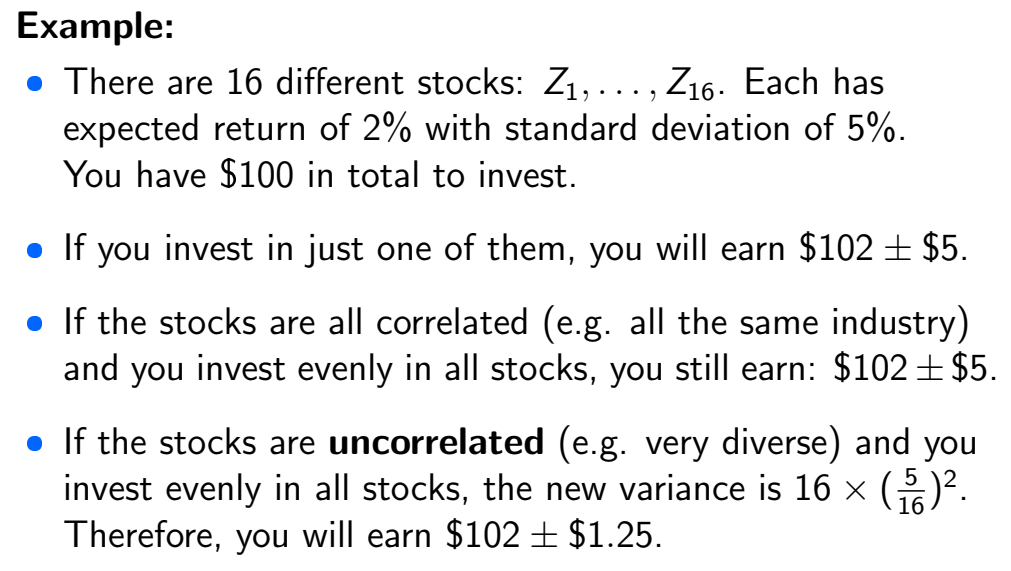

- S8. Escreva $|x| < y$ como restrição cônica de segunda ordem (restrição SOC).
- S9. Mostre como escrever QPs e QCQPs como SOCPs.
- S10. Escreva código em Julia para reproduzir as figuras nos slides 13-17 (incerteza = bola em norma infinita), e 13-20 (incerteza = bola em norma-2).
- S11. Verifique que as duas formas de escrever um SDP (no slide 13-26) são equivalentes.
- S12. Verifique as afirmações nos slides 13-27 e 13-28.